# Exploration de données temporelles avec Matlab

Ce document(*) contient des éléments de réponse aux questions posées dans le document [00 Scenario.pdf](../session%202019/00%20Scenario.pdf) (version 2019) et  qui est la feuille de route du cours-TP « Exploration de données temporelles avec Matlab ».

Ce document est un « notebook Jupyter», c'est-à-dire un mélange de texte et de code exécutable.
Il a été créé sous [Jupyter lab](https://jupyter.org/), avec l'aide du « kernel » [imatlab](https://github.com/imatlab/imatlab) pour la connexion à Matlab.

*Pierre Haessig & Marie-Anne Lefebvre – octobre 2019*

### Préambule

Vérification version Matlab: **R2018b** attendue

In [1]:
disp(version) 

9.5.0.1178774 (R2018b) Update 5


Configuration : affichage des graphiques "inline" (cf imatlab's [README](https://github.com/imatlab/imatlab#inline-graphics))

In [2]:
imatlab_export_fig('print-png')  % Static png figures.
%imatlab_export_fig('')  % Native windows.

## 1) Chargement & prétraitements des données

### Charger fichier de données avec `readtable`

Objectif : charger le fichier `data/meteo_rennes_2015.txt`

In [3]:
opts = detectImportOptions('data/meteo_rennes_2015.txt')


opts = 

  DelimitedTextImportOptions with properties:

   Format Properties:
                    Delimiter: {'\t'  ' '}
                   Whitespace: '\b'
                   LineEnding: {'\n'  '\r'  '\r\n'}
                 CommentStyle: {}
    ConsecutiveDelimitersRule: 'join'
        LeadingDelimitersRule: 'ignore'
                EmptyLineRule: 'skip'
                     Encoding: 'windows-1252'

   Replacement Properties:
                  MissingRule: 'fill'
              ImportErrorRule: 'fill'
             ExtraColumnsRule: 'addvars'

   Variable Import Properties: Set types by name using setvartype
                VariableNames: {'Var1', 'Var2', 'Var3' ... and 9 more}
                VariableTypes: {'double', 'double', 'double' ... and 9 more}
        SelectedVariableNames: {'Var1', 'Var2', 'Var3' ... and 9 more}
              VariableOptions: [1x12 matlab.io.NumericVariableImportOptions] 
	Access VariableOptions sub-properties using setvaropts/getvaropts

   Location Prope

[readtable](https://fr.mathworks.com/help/matlab/ref/readtable.html): Create table from file

In [4]:
meteo = readtable('data/meteo_rennes_2015.txt', opts);

[head](https://fr.mathworks.com/help/matlab/ref/head.html): Get top rows of table, timetable, or tall array

In [5]:
head(meteo, 3)


ans =

  3x12 table

    Var1    Var2    Var3    Var4    Var5    Var6    Var7     Var8    Var9    Var10    Var11    Var12
    ____    ____    ____    ____    ____    ____    _____    ____    ____    _____    _____    _____

    2015     1       1       0      -25     -35     10376    140      15       0      -9999        0
    2015     1       1       1      -30     -40     -9999    150      10       0      -9999    -9999
    2015     1       1       2      -30     -40     -9999    150      10       0      -9999    -9999



Cosmétique (facultatif) : renommage des noms des colonnes via les [table.Properties](https://fr.mathworks.com/help/matlab/ref/table.html#mw_cb8d6608-0cf9-4164-b1f8-7bce6caa23ce)

In [6]:
meteo.Properties.VariableNames(1) = {'Annee'};
meteo.Properties.VariableNames(2) = {'Mois'};
meteo.Properties.VariableNames(3) = {'Jour'};
meteo.Properties.VariableNames(4) = {'Heure'};
meteo.Properties.VariableNames(5) = {'Temp'};

Mise à l'échelle de la température (cf. documentation du jeu de données [data/ISD-Lite 2006 format.pdf](data/ISD-Lite%202006%20format.pdf))

In [7]:
meteo.Temp = meteo.Temp/10;

In [8]:
head(meteo, 3)


ans =

  3x12 table

    Annee    Mois    Jour    Heure    Temp    Var6    Var7     Var8    Var9    Var10    Var11    Var12
    _____    ____    ____    _____    ____    ____    _____    ____    ____    _____    _____    _____

    2015      1       1        0      -2.5    -35     10376    140      15       0      -9999        0
    2015      1       1        1        -3    -40     -9999    150      10       0      -9999    -9999
    2015      1       1        2        -3    -40     -9999    150      10       0      -9999    -9999



Copie d'une colonne dans une autre variable

In [9]:
Temp = meteo.Temp;
Temp(1:3)


ans =

   -2.5000
   -3.0000
   -3.0000



Remarque : `Temp` est matrice (array) « classique » de Matlab. Si on veut extraire une colonne en gardant le type `table`, il faut utiliser la syntaxe de slicing

In [10]:
class(meteo.Temp)
class(meteo(:,'Temp'))


ans =

    'double'


ans =

    'table'



### Données manquantes ou aberrantes

Température moyenne : fait-il si froid à Rennes !?

In [11]:
mean(Temp)


ans =

    0.0876



Réponse : non, il y a « juste » des données **aberrantes**.


<div style="background:#d7ffb0;border: 1px solid #4ea000;padding:5px;">
    Bonne pratique : toujours <strong>regarder</strong> les données avant de les utiliser. Par exemple avec plot ou histogram.
</div>

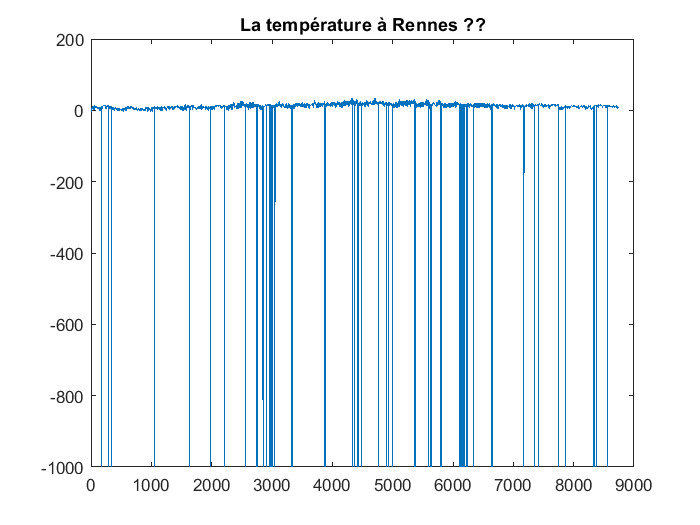

In [12]:
plot(Temp)
title('La température à Rennes ??')

In [13]:
min(Temp)


ans =

 -999.9000



La raison du problème : les données manquantes sont notées -9999 dans le fichier (cf. documentation du jeu de données [data/ISD-Lite 2006 format.pdf](data/ISD-Lite%202006%20format.pdf)). La mise à l'échelle a transformé cette valeur en -999.9

Solution : marquer ces valeurs comme **manquantes**

* Doc : [Missing Data in MATLAB](https://fr.mathworks.com/help/matlab/data_analysis/missing-data-in-matlab.html)
* fonction [missing](https://fr.mathworks.com/help/matlab/ref/missing.html): Create missing values → renvoi un `NaN` dans un contexte de tableau de nombres

Démo de missing utilisé dans un tableau de nombres :

In [14]:
[1 missing 3]


ans =

     1   NaN     3



#### Aparté sur le *logical indexing*

Pour le marquage des valeurs manquantes, on peut se servir du [logical indexing](https://blogs.mathworks.com/steve/2008/01/28/logical-indexing/)
(syntaxe très utile en Matlab, mais aussi avec les tableaux [numpy](https://numpy.org/) en Python)

In [15]:
Temp_bad = Temp == -999.9;  %crée en logical array
Temp_bad(1:3)


ans =

  3x1 logical array

   0
   0
   0



Ce vecteur logique peut servir à répondre à quelques questions intéressantes :

* Combien y a-t-il de valeurs absurdes ? → Somme du vecteur
* Quelle est la proportion de valeurs absurdes ? → Moyenne du vecteur

In [18]:
disp(sum(Temp_bad))
disp(mean(Temp_bad)*100) % en %

   105

    1.2015



#### Marquer les valeurs aberrantes comme manquantes

L’indexation logique permet de **sélectionner** les indices `k` pour lesquels `Temp_bad(k)` est vrai, c.-à-d. les valeurs aberrantes.

Et on peut faire une **assignation** sur ces valeurs sélectionnées :

In [19]:
Temp(Temp_bad) = missing;

Par exemple, on peut voir une valeur manquante à l'indice 175:

In [20]:
disp(Temp(172:178))

   10.3000
   10.7000
   10.7000
       NaN
   11.3000
   11.7000
   11.2000



Cependant, il n'y a pas seulement des données aberrantes, mais il y a aussi des **données non enregistrées**, cad des lignes manquantes dans le fichier

Avec [height](https://fr.mathworks.com/help/matlab/ref/height.html) (longueur du tableau) on peut voir qu'il y a moins de lignes que d'heure dans l'année 2015

In [21]:
365*24 - height(meteo)


ans =

    21



Attention, les changements de la variable `Temp` ne sont pas reproduits dans `meteo.Temp`, car c'était une copie. Il faut donc faire la copie dans l'autre sens :

In [22]:
meteo.Temp = Temp;

A présent, le tracé de la température a bonne allure, mais...

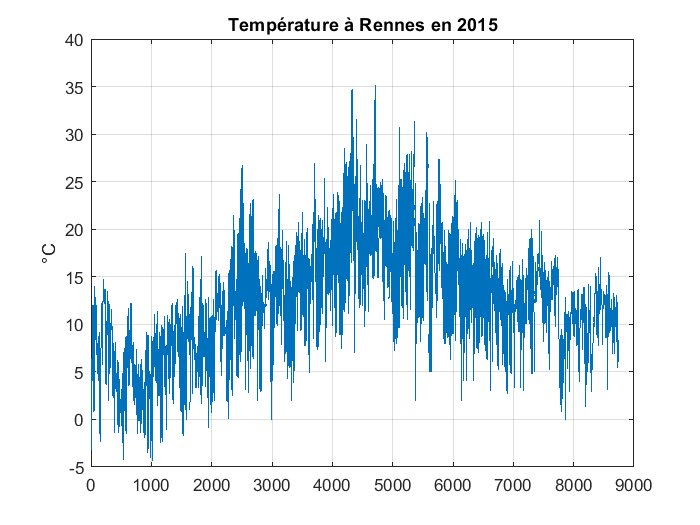

In [25]:
plot(Temp)
title('Température à Rennes en 2015')
ylabel('°C')
grid on;

... mais attention, les NaNs *ne sont pas détectables* sur le graphique, même s'ils sont bien présents. Exemple avec un zoom autour de l'indice 2200. 

Et par ailleurs, les 21 lignes manquantes ne sont *pas du tout visibles*, car on ne fait pas un tracé fonction du temps, mais fonction des indices.

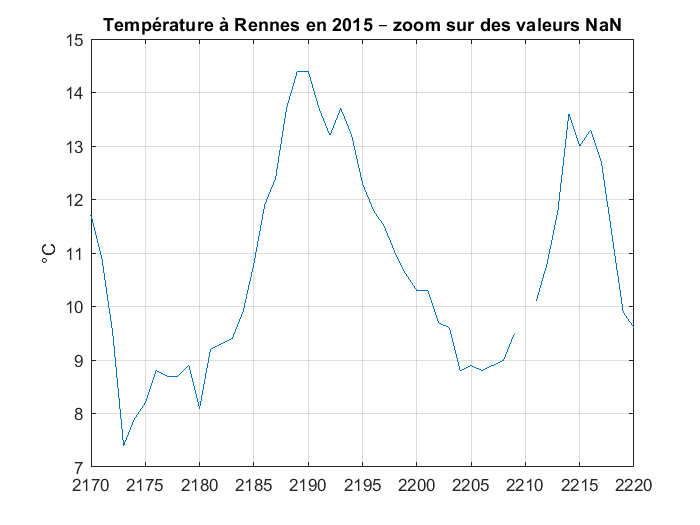

In [26]:
plot(Temp)
title('Température à Rennes en 2015 – zoom sur des valeurs NaN')
ylabel('°C')
grid on;

% Zoom :
xlim([2170 2220])

#### Statistiques avec valeurs manquantes

Calcul de la moyenne : attention à la **propagation des NaNs** !

→ Il faut utiliser des fonctions dédiées aux statistiques avec des NaNs.

(ou bien le `nanflag` égal à `'omitnan'` de la fonction [mean](https://fr.mathworks.com/help/matlab/ref/mean.html) dans les versions récentes de Matlab)

Doc de référence: [Data with Missing Values](https://fr.mathworks.com/help/stats/data-with-missing-values.html)

In [27]:
1 + NaN


ans =

   NaN



In [28]:
disp(mean(Temp))

   NaN



Et donc il a fait 12.2°C en moyenne à Rennes en 2015:

In [29]:
disp(nanmean(Temp))

   12.2487



In [30]:
% Code équivalent, pour version récente de Matlab :
disp(mean(Temp, 'omitnan'))

   12.2487



### Aparté pour voir la répartition des données : histogramme 

cf. fonction [histogram](https://fr.mathworks.com/help/matlab/ref/matlab.graphics.chart.primitive.histogram.html)
(Matlab ≥R2014b, à préférer à la fonction plus ancienne `hist`)

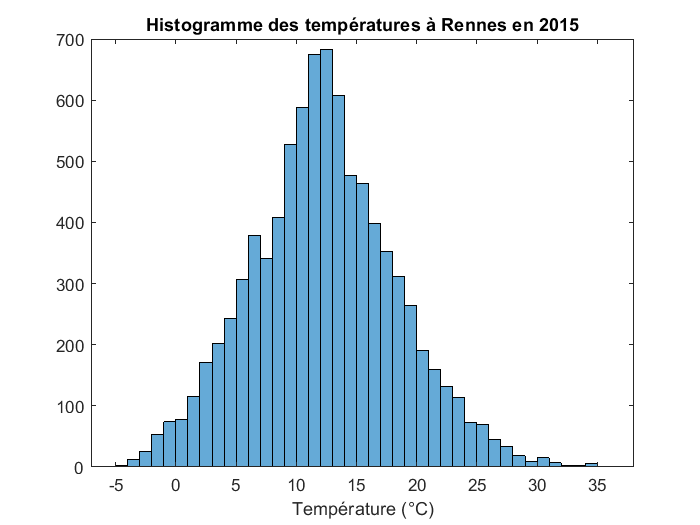

In [31]:
histogram(Temp)
title('Histogramme des températures à Rennes en 2015')
xlabel('Température (°C)')

### Dates : parsing (décodage) et représentation

Fonction constructeur [datetime](https://fr.mathworks.com/help/matlab/ref/datetime.html): Arrays that represent points in time.

Le type compagnon est [duration](https://fr.mathworks.com/help/matlab/ref/duration.html), que l'on peut créer succinctement avec `days`, `hours`…

In [32]:
% Démo de l'arithmétique des datetime et duration:
d = datetime('2019-09-25');
days(3); % ou : days * 3
disp(d + days(3))

   28-Sep-2019 00:00:00



Datetime pour le fichier météo à Rennes :

In [33]:
meteo_date = datetime(meteo.Annee, meteo.Mois, meteo.Jour,...
                      meteo.Heure, 0,0);
meteo_date(1:3)


ans = 

  3x1 datetime array

   01-Jan-2015 00:00:00
   01-Jan-2015 01:00:00
   01-Jan-2015 02:00:00



In [34]:
disp(class(meteo_date))

datetime


#### Conversion table → timetable

Une fois la date décodée, le conteneur `table` peut être converti en `timetable` qui facilite le traitement des données horodatées. 
*(introduced in R2016b)*.

cf [Timetables](https://fr.mathworks.com/help/matlab/timetables.html) doc

In [35]:
meteo_TT = table2timetable(meteo, 'RowTimes', meteo_date);
head(meteo_TT, 3)


ans =

  3x12 timetable

            Time            Annee    Mois    Jour    Heure    Temp    Var6    Var7     Var8    Var9    Var10    Var11    Var12
    ____________________    _____    ____    ____    _____    ____    ____    _____    ____    ____    _____    _____    _____

    01-Jan-2015 00:00:00    2015      1       1        0      -2.5    -35     10376    140      15       0      -9999        0
    01-Jan-2015 01:00:00    2015      1       1        1        -3    -40     -9999    150      10       0      -9999    -9999
    01-Jan-2015 02:00:00    2015      1       1        2        -3    -40     -9999    150      10       0      -9999    -9999



#### Analyse de l'échantillonnage

L'inspection superficielle de l'archive météo montre un enregistrement toutes les heures, mais est-ce *vraiment périodique* ?

Réponse : non avec la fonction [isregular(TT)](https://fr.mathworks.com/help/matlab/ref/timetable.isregular.html) (on a vu plus haut qu'il manque 21 heures)

In [37]:
disp(isregular(meteo_TT))

   0



Si on veut plus de détail, la fonction Matlab classique `diff` (filtre $y_k = u_k -u_{k-1}$) fonctionne aussi avec les tableaux `datetime` (elle renvoie un tableau de `duration`) :

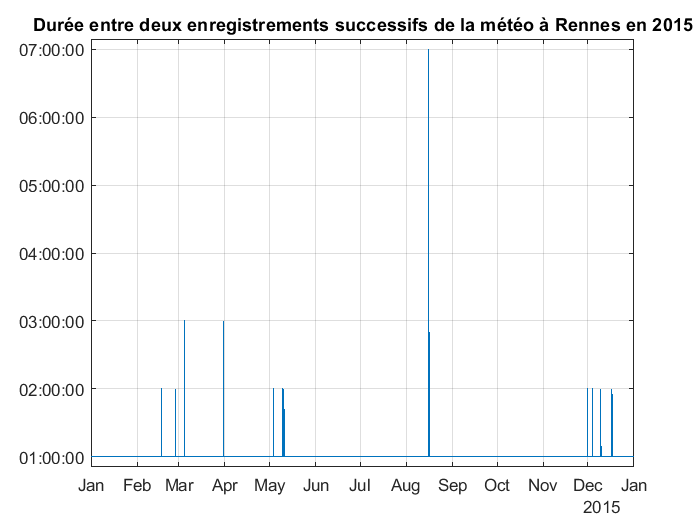

In [39]:
plot(meteo_TT.Time(1:end-1), diff(meteo_TT.Time))
title('Durée entre deux enregistrements successifs de la météo à Rennes en 2015')
grid on

#### Sélectionner un intervalle de temps

Exemple : mois de juin 

méthode 1 (plus générique) avec une indexation par un [timerange](https://fr.mathworks.com/help/matlab/ref/timerange.html)

In [40]:
TR = timerange('2015-06-01','2015-07-01');
meteo_juin = meteo_TT(TR, :);
disp(nanmean(meteo_juin.Temp))

   17.1027



méthode 2 (plus spécifique) : avec logical indexing

In [41]:
meteo_juin2 = meteo(meteo_date.Month==6, :);
disp(nanmean(meteo_juin2.Temp))

   17.1027



À présent, le tracé temporel peut se faire avec les dates, en fournissant le vecteur de datetime en abscisse de `plot`:

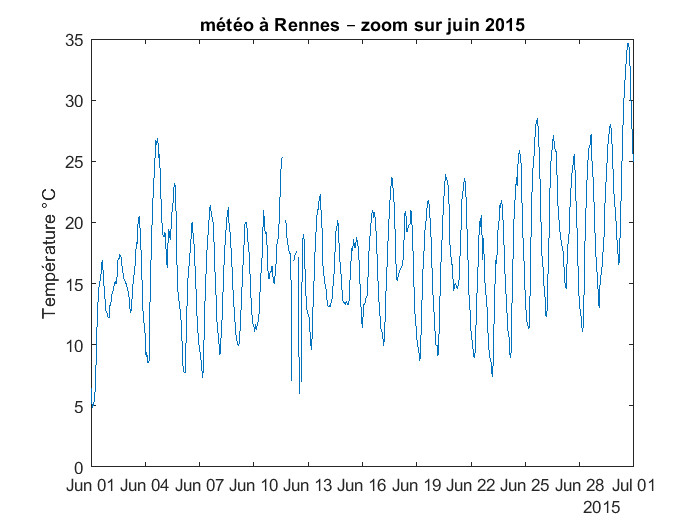

In [44]:
plot(meteo_juin.Time, meteo_juin.Temp)
title('météo à Rennes – zoom sur juin 2015')
ylabel('Température °C')

Rappel : un histogramme est toujours utile, par exemple pour constater, sans faire de tracé temporel, que la température peut descendre jusqu'à 5°C en juin !

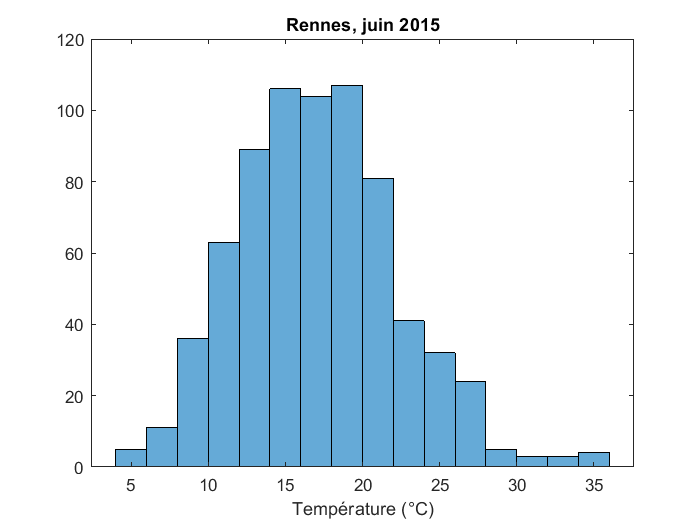

In [45]:
histogram(meteo_juin2.Temp)
title('Rennes, juin 2015')
xlabel('Température (°C)')

## 2) Mise en forme & synchronisation de données

Fichiers : log capteur de qualité de l’air salle 404 (et archive météo)

Aperçu de `log-20150309-171821.csv` :
```
date;time;type;value;unit
09/03/2015;17:18:29.244;carbon dioxide;1630;ppm
09/03/2015;17:19:12.416;indoor relative humidity;37.0;%
09/03/2015;17:20:12.689;indoor relative humidity;37.0;%
```
→ Un beau fichier CSV bien formaté, séparé par des `;`, avec des nombres et du texte.

Et c'est bien ce que détecte `detectImportOptions` :

In [46]:
opts = detectImportOptions('data/log-20150309-171821.csv')


opts = 

  DelimitedTextImportOptions with properties:

   Format Properties:
                    Delimiter: {';'}
                   Whitespace: '\b\t '
                   LineEnding: {'\n'  '\r'  '\r\n'}
                 CommentStyle: {}
    ConsecutiveDelimitersRule: 'split'
        LeadingDelimitersRule: 'keep'
                EmptyLineRule: 'skip'
                     Encoding: 'windows-1252'

   Replacement Properties:
                  MissingRule: 'fill'
              ImportErrorRule: 'fill'
             ExtraColumnsRule: 'addvars'

   Variable Import Properties: Set types by name using setvartype
                VariableNames: {'date', 'time', 'type' ... and 2 more}
                VariableTypes: {'datetime', 'duration', 'char' ... and 2 more}
        SelectedVariableNames: {'date', 'time', 'type' ... and 2 more}
              VariableOptions: [1x5 matlab.io.VariableImportOptions] 
	Access VariableOptions sub-properties using setvaropts/getvaropts

   Location Properties:
   

In [47]:
%% Chargement données capteur qualité de l'air
log = readtable('./data/log-20150309-171821.csv', opts);
disp(head(log, 3))

            date                time                   type               value    unit 
    ____________________    ____________    __________________________    _____    _____

    09-Mar-2015 00:00:00    17:18:29.244    'carbon dioxide'              1630     'ppm'
    09-Mar-2015 00:00:00    17:19:12.416    'indoor relative humidity'      37     '%'  
    09-Mar-2015 00:00:00    17:20:12.689    'indoor relative humidity'      37     '%'  



Observation sur les dates :
* la colonne `date` est bien parsée en `datetime`
* la colonne `time` est bien parsée en `duration`

In [48]:
disp(class(log.date)) % datetime
disp(class(log.time)) % duration

datetime
duration


Cependant, dans Matlab R2017b, colonne `time` n'était pas parsée. Il fallait faire le *parsing* (décodage) à la main:

In [ ]:
% log_time = datetime(log.time, 'InputFormat', 'HH:mm:ss.SSS');
% log_time = timeofday(log_time); % datetime → duration

Combinaison de la date et de l'heure : addition. Cependant, l'affichage est *trompeur* (Note : sur la version de Matlab 2018b de la salle 409, il n'y a pas ce problème…)

In [49]:
log_datetime = log.date + log.time;
disp(log_datetime(1:3))

   09-Mar-2015 17:18:29
   09-Mar-2015 17:19:12
   09-Mar-2015 17:20:12



**À lire absolument** : le code des chaines de caractères qui permet de spécifier [datetime.Format](https://fr.mathworks.com/help/matlab/ref/datetime.html#buhzxmk-1-Format)

(NB : en Python c'est une syntaxe très similaire avec le fonction de parsing [datetime.strptime](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior))

In [51]:
log_datetime.Format


ans =

    'dd-MMM-uuuu HH:mm:ss'



En attribuant à `log_datetime` une chaine de formatage plus adaptée, on obtient un affichage approprié :

In [52]:
%log_datetime.Format = 'default';
log_datetime.Format = 'yyyy-MM-dd HH:mm:ss.SSS';
disp(log_datetime(1:3))

   2015-03-09 17:18:29.244
   2015-03-09 17:19:12.416
   2015-03-09 17:20:12.689



Conversion en Timetable:

In [53]:
log_TT = table2timetable(log, 'RowTimes', log_datetime);
disp(head(log_TT, 3))

             Time                      date                time                   type               value    unit 
    _______________________    ____________________    ____________    __________________________    _____    _____

    2015-03-09 17:18:29.244    09-Mar-2015 00:00:00    17:18:29.244    'carbon dioxide'              1630     'ppm'
    2015-03-09 17:19:12.416    09-Mar-2015 00:00:00    17:19:12.416    'indoor relative humidity'      37     '%'  
    2015-03-09 17:20:12.689    09-Mar-2015 00:00:00    17:20:12.689    'indoor relative humidity'      37     '%'  



De façon générale, le datetime Format est la seule solution pour parser des dates suffisamment bizarres pour que Matlab ne détecte pas le format tout seul. Exemple :

In [54]:
dates_bizarres = {'01/09/2019 à 01h25' '01/10/2019 à 02h45'};
datetime(dates_bizarres)

Error using datetime (line 635)
Could not recognize the format of the date/time text. You can specify a format using the 'InputFormat' parameter. If the date/time text contain day, month, or time zone names in a language foreign to the 'en_US' locale, those might not be recognized. You can specify a different locale using the 'Locale' parameter.


In [55]:
disp(datetime(dates_bizarres, 'InputFormat', 'dd/MM/yyyy à HH''h''mm' ))

   01-Sep-2019 01:25:00   01-Oct-2019 02:45:00



### Données catégorielles & Statistiques par groupes

Certaines données sont à valeur discrète. Elles sont appelées « [variables catégorielles](https://fr.wikipedia.org/wiki/Variable_cat%C3%A9gorielle) » Exemples :

* Fichier météo à Rennes : Mois = 1, 2, 3... (entier)
* Log capteur : type = 'carbon dioxide', ... (chaîne de caractères)
* Champs `Month`, `Day`, `Hour`… d’un tableau `datetime`

Pour les catégories numériques, pas de problème, mais par contre les catégories représentées par des chaînes de caractères sont *très inefficaces*.
Il y a une alternative dédiée et beaucoup plus efficace : le type [categorical](https://fr.mathworks.com/help/matlab/ref/categorical.html) (voir aussi doc [Categorical Arrays](https://fr.mathworks.com/help/matlab/categorical-arrays.html)).

In [56]:
% log.type est un cell array de chaine de caractères
disp(class(log.type))
disp(class(log.type{1}))

cell
char


Colonne `type` : 118 008 chaines de caractères, pesant 18 Mo

In [57]:
type = log.type;
whos type

  Name           Size               Bytes  Class    Attributes

  type      118008x1             18202288  cell               



La conversion en [categorical](https://fr.mathworks.com/help/matlab/ref/categorical.html) ramène le poids à peine plus de 118 ko (~1 octet par élément)

In [58]:
type = categorical(type);
whos type

  Name           Size             Bytes  Class          Attributes

  type      118008x1             118916  categorical              



Note : on peut observer la disparition des `'` dans la colonne `type` (et on pourrait appliquer la même conversion à la colonne `unit`)

In [59]:
log.type = type;
disp(head(log, 3))

            date                time                  type              value    unit 
    ____________________    ____________    ________________________    _____    _____

    09-Mar-2015 00:00:00    17:18:29.244    carbon dioxide              1630     'ppm'
    09-Mar-2015 00:00:00    17:19:12.416    indoor relative humidity      37     '%'  
    09-Mar-2015 00:00:00    17:20:12.689    indoor relative humidity      37     '%'  



Fonctions utiles :
* lister toutes les catégories contenues dans un vecteur : `unique` ou `categories` (renvoient respectivement un categorical ou un cell array de strings)
* compter les occurrences de chaque catégorie : [countcats](https://fr.mathworks.com/help/matlab/ref/categorical.countcats.html)

In [60]:
unique(type)


ans = 

  6x1 categorical array

     carbon dioxide 
     indoor relative humidity 
     indoor temperature 
     outdoor temperature 
     solar Irradiance 
     volatile organic compounds 



In [61]:
categories(type)


ans =

  6x1 cell array

    {'carbon dioxide'            }
    {'indoor relative humidity'  }
    {'indoor temperature'        }
    {'outdoor temperature'       }
    {'solar Irradiance'          }
    {'volatile organic compounds'}



Comptage : on en déduit que c'est pour 'indoor relative humidity' que l'on a le plus de mesures.

In [62]:
countcats(type)


ans =

       17612
       52842
       17610
        1902
       10429
       17613



#### Statistiques par groupes, boxplot

Les variables catégorielles peuvent servir de [Grouping Variables](https://fr.mathworks.com/help/stats/grouping-variables.html), par exemple pour :
* calculer des [statistiques par groupes](https://fr.mathworks.com/help/stats/summary-statistics-grouped-by-category.html) (⚠) (avec fonction [grpstats](https://fr.mathworks.com/help/stats/grpstats.html))
* tracer un [boxplot](https://fr.mathworks.com/help/stats/boxplot.html).

(⚠) Attention: le guide « Summary Statistics Grouped by Category » utilise le type de données `dataset array` qui est déprécié au profit de `table`. Par contre la fonction `grpstats` est toujours d'actualité.

Boxplot: 

Pour une comparaison rapide de la distribution de la température *pour chaque mois* : boxplot, en utilisant la variable Mois pour le regroupement

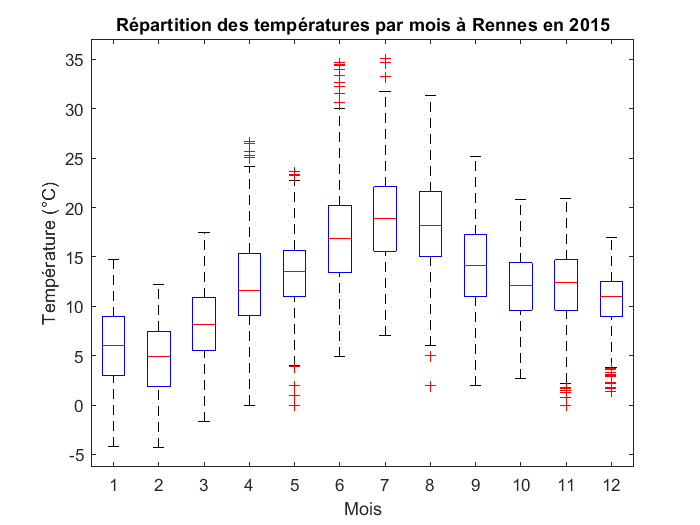

In [63]:
boxplot(meteo.Temp, meteo.Mois)

xlabel('Mois')
ylabel('Température (°C)')
title('Répartition des températures par mois à Rennes en 2015')
% Amélioration: remplacer le xticklabels numérique par le nom des mois
% xticklabels({'Jan',  'Fév','Mar', '...'})

Statistiques par groupes :

Avec [grpstats](https://fr.mathworks.com/help/stats/grpstats.html)
on peut obtenir les données sous-jacentes du boxplot, comme la moyenne mois par mois :

In [64]:
Temp_by_month_avg = grpstats(meteo.Temp, meteo.Mois, 'mean');

Et l'on peut aussi calculer plusieurs stats d'un seul coup, par exemple min et max (toujours mois par mois) :

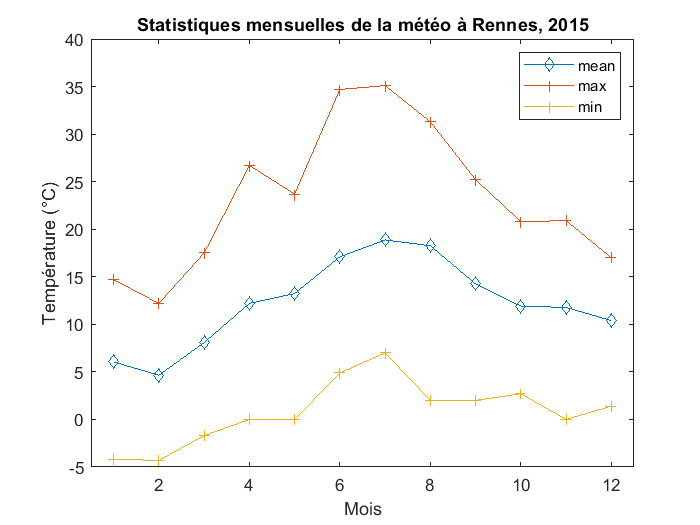

In [66]:
[Temp_by_month_max, Temp_by_month_min]  = grpstats(meteo.Temp, meteo.Mois, {'max', 'min'});
plot(Temp_by_month_avg, '-d')
hold on
plot(Temp_by_month_max, '-+')
plot(Temp_by_month_min, '-+')
legend('mean', 'max', 'min')


xlabel('Mois')
xlim([0.5, 12.5])
ylabel('Température (°C)')
title('Statistiques mensuelles de la météo à Rennes, 2015')

### Empilement/désempilement

Les données du capteur de qualité de l'air sont dans un format dit "long" ([vs "narrow"](https://en.wikipedia.org/wiki/Wide_and_narrow_data)) aussi appelé "empilé" (EN : "stacked"). Voir aussi la diapo du cours correspondante.

#### Extraction par logical indexing

Pour récupérer un seul type de mesure, le logical indexing est suffisant

In [72]:
is_Temp_in = type == 'indoor temperature';
disp(mean(is_Temp_in)) % proportion de mesures de ce type parmi toutes les mesures

    0.1492



Extraction des données de température intérieure, extérieure et de concentration CO2 :

In [73]:
Temp_in = log_TT(type == 'indoor temperature', 'value'); %si on veut plusieurs colonnes, utiliser un cell-array {'type', 'value'}
Temp_out = log_TT(type == 'outdoor temperature', 'value');
CO2 = log_TT(type == 'carbon dioxide', 'value');

head(Temp_in, 3)


ans =

  3x1 timetable

             Time              value
    _______________________    _____

    2015-03-09 17:21:02.496    23.4 
    2015-03-09 17:24:03.886    23.3 
    2015-03-09 17:27:03.094    23.3 



#### Unstack : le désempilement automatique

Si on veut séparer en une seule opération chaque type de mesure dans une seule colonne,
on peut utiliser [unstack](https://fr.mathworks.com/help/matlab/ref/unstack.html) :

In [74]:
log_TT_unstack = unstack(log_TT, 'value', 'type'); % log_TT_unstack est plein de NaNs
disp(head(log_TT_unstack, 3))

             Time              carbonDioxide    indoorRelativeHumidity    indoorTemperature    outdoorTemperature    solarIrradiance    volatileOrganicCompounds
    _______________________    _____________    ______________________    _________________    __________________    _______________    ________________________

    2015-03-09 17:18:29.244        1630                  NaN                     NaN                  NaN                  NaN                    NaN           
    2015-03-09 17:19:12.416         NaN                   37                     NaN                  NaN                  NaN                    NaN           
    2015-03-09 17:20:12.689         NaN                   37                     NaN                  NaN                  NaN                    NaN           



On peut alors tracer les données :

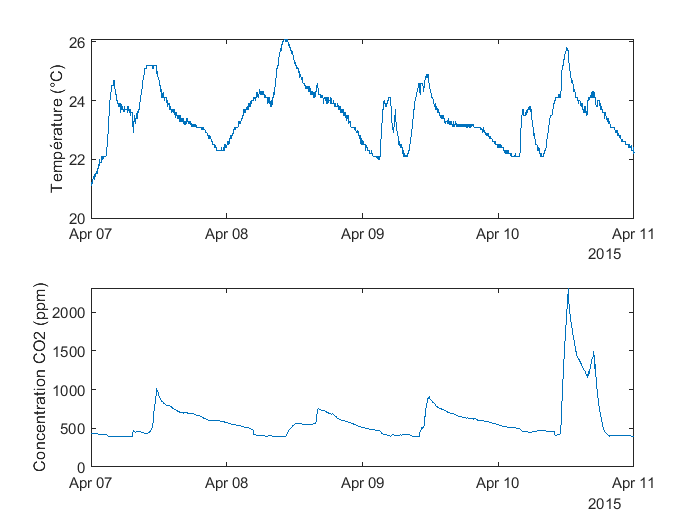

In [75]:
date_lim = [datetime(2015,04,07) datetime(2015,04,11)];

subplot(2,1,1)
plot(Temp_in.Time, Temp_in.value)
ylabel('Température (°C)')
xlim(date_lim)

subplot(2,1,2)
plot(CO2.Time, CO2.value)
ylabel('Concentration CO2 (ppm)')
xlim(date_lim)

Problème : que ce soit par l'extraction à la main via le logical indexing, ou bien avec `unstack`, les mesures des différents capteurs ne sont **pas synchronisées**.

Conséquence : impossible de faire des modèles (par ex. une régression d'une variable sur l'autre) ni même un simple nuage de point.

In [77]:
plot(Temp_in.value, CO2.value, ',')

Error using plot
Vectors must be the same length.


### Rééchantillonnage, agrégation et resynchronisation

Avant de traiter de la resynchronisation de plusieurs séries de données,
voyons le rééchantillonnage d'une série seule.

#### Rééchantillonnage

avec [retime](https://fr.mathworks.com/help/matlab/ref/timetable.retime.html) :

Syntaxe 1 (la plus simple) :

```
TT2 = retime(TT1,newTimeStep)
TT2 = retime(TT1,newTimeStep,method)
```

avec :

* `newTimeStep` = 'daily', 'hourly', 'minutely'...
* `method` indique la méthode d'interpolation ou d'agrégation à utiliser :

  * Interpolation : 'nearest', 'previous' (~blocage d'ordre zéro), 'linear'
  * Agrégation : 'mean', 'sum', 'max'… (lorsqu'on veut agréger statistiquement les données en utilisant un pas nettement plus long)

Styntaxe 2, pour pouvoir spécifier le pas de temps de façon plus fine
(Matlab ≥[R2018a](https://fr.mathworks.com/help/matlab/release-notes.html?category=data-analysis&rntext=retime&startrelease=R2018a&endrelease=R2018a&groupby=release&sortby=descending&searchHighlight=retime)) :

```
TT2 = retime(TT1,'regular',method,'TimeStep',dt)
TT2 = retime(TT1,'regular','TimeStep',dt)
```

avec `dt` une `duration` quelconque.

Remarque : on peut aussi rééchantillonner sur un vecteur temps quelconque passé en argument (syntaxe 3 : `TT2 = retime(TT1,newTimes,method)`)


Exemple : rééchantillonage à la minute avec `method='previous'` → crée un NaN pour à de 17:21, comme la première mesure date de 17:21:02

In [78]:
Temp_in_1m = retime(Temp_in, 'minutely', 'previous');
% Equivalent avec syntaxe 2 :
Temp_in_1m = retime(Temp_in, 'regular', 'previous', 'TimeStep', minutes(1));

% Comparaison avant après
disp(head(Temp_in, 3))
disp(head(Temp_in_1m, 8))

             Time              value
    _______________________    _____

    2015-03-09 17:21:02.496    23.4 
    2015-03-09 17:24:03.886    23.3 
    2015-03-09 17:27:03.094    23.3 

             Time              value
    _______________________    _____

    2015-03-09 17:21:00.000     NaN 
    2015-03-09 17:22:00.000    23.4 
    2015-03-09 17:23:00.000    23.4 
    2015-03-09 17:24:00.000    23.4 
    2015-03-09 17:25:00.000    23.3 
    2015-03-09 17:26:00.000    23.3 
    2015-03-09 17:27:00.000    23.3 
    2015-03-09 17:28:00.000    23.3 



Cependant, si on fait un retime pour chaque série individuellement, on ne pourra quand même pas forcément les concaténer, car les instants de début et de fin ne coïncideront pas forcément. Il faut **synchroniser les données**.

#### Synchroniser des Timetables

Deux solutions :

* faire un `retime` sur `log_TT_unstack` qui contient déjà toutes les mesures dans des colonnes séparées. Cela va remplir les NaNs
* utiliser [synchronize](https://fr.mathworks.com/help/matlab/ref/timetable.synchronize.html) (⚠): *“Synchronize timetables to common time vector, and resample or aggregate data from input timetables”*

(⚠ fonction `synchronize` pour les objets `table`, à ne pas confondre avec [synchronize](https://fr.mathworks.com/help/matlab/ref/timeseries.synchronize.html) pour les objets `timeseries `)

Méthode 1 : `retime` sur une Timetable “unstacked”:

In [79]:
log_3m = retime(log_TT_unstack, 'regular', 'previous', 'TimeStep', minutes(3)); % ou method='nearest' si on veut aucun NaN
disp(head(log_3m, 10));

             Time              carbonDioxide    indoorRelativeHumidity    indoorTemperature    outdoorTemperature    solarIrradiance    volatileOrganicCompounds
    _______________________    _____________    ______________________    _________________    __________________    _______________    ________________________

    2015-03-09 17:18:00.000         NaN                  NaN                     NaN                   NaN                 NaN                     NaN          
    2015-03-09 17:21:00.000        1630                   36                     NaN                   NaN                 NaN                     NaN          
    2015-03-09 17:24:00.000        1630                   36                    23.4                   NaN                  11                     0.5          
    2015-03-09 17:27:00.000        1630                   36                    23.3                   NaN                  11                     0.5          
    2015-03-09 17:30:00.000      

Après ce rééchantillonnage, `isregular` renvoie bien true

In [80]:
disp(isregular(log_3m))

   1



La resynchro permet de faire des nuages de points par exemple (et ensuite des régressions et autres analyses)

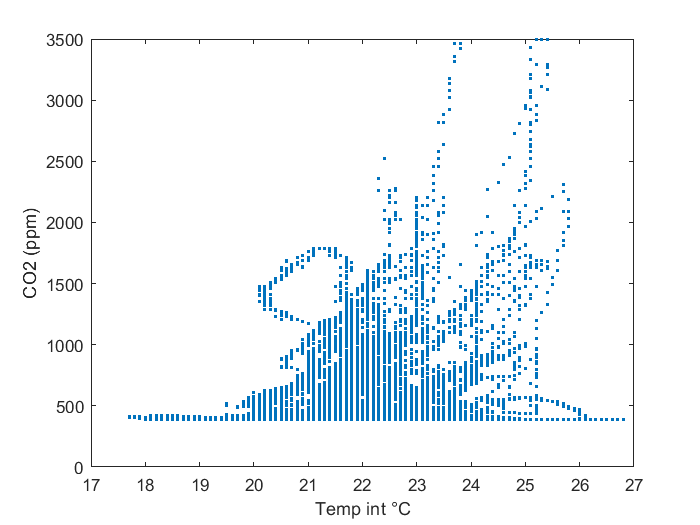

In [81]:
plot(log_3m.indoorTemperature, log_3m.carbonDioxide, '.')
xlabel('Temp int °C')
ylabel('CO2 (ppm)')

#### Aparté : scatter plot

Le même nuage de point, mais avec `scatter`, ce qui permet d'utiliser la transparence des points (fonction [alpha](https://fr.mathworks.com/help/matlab/ref/alpha.html)).

`scatter` permet aussi de changer la *couleur* ou la *taille* en fonction d'une autre variable.

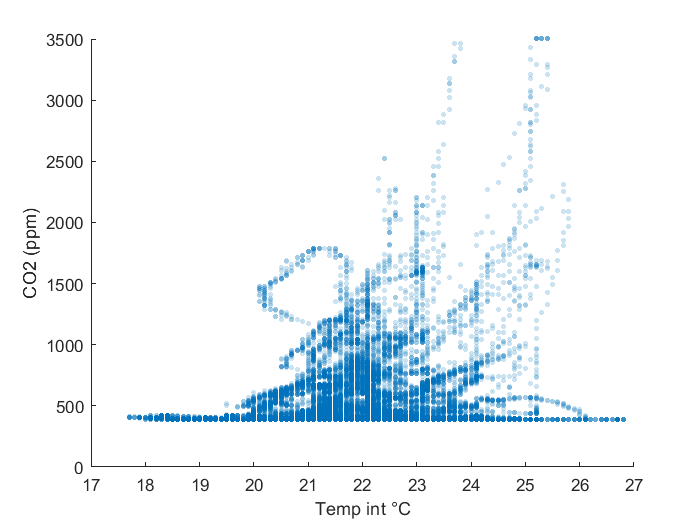

In [82]:
s = scatter(log_3m.indoorTemperature, log_3m.carbonDioxide, 'filled', 'SizeData',10);
xlabel('Temp int °C')
ylabel('CO2 (ppm)')
alpha(s, 0.2)

Méthode 2 : utiliser [synchronize](https://fr.mathworks.com/help/matlab/ref/timetable.synchronize.html)

Comme avec `retime`, il y a deux syntaxes pour indiquer le pas de temps :

Syntax 1, avec `newTimeStep` = 'daily', 'hourly', 'minutely'...

```
TT = synchronize(TT1,TT2,newTimeStep,method)
```

Syntaxe 2, plus flexible, où `dt` est n'importe quelle `duration` :

```
TT = synchronize(TT1,TT2,'regular',method,'TimeStep',dt)
```

Et on n'est pas limité à seulement 2 Timetables. On peut en synchroniser autant que désiré : `TT = synchronize(TT1,...,TTN,___)`


Accessoirement, il est possible d'utiliser la syntaxe
`TT = synchronize(TT1,TT2,newTimeBasis,method)`
où `newTimeBasis` peut être 'union' (*Union of the row times*), 'intersection' (*Intersection of the row times*) et quelques autres, au lieu de spécifier juste un pas de temps.

Application aux 3 Timetable extraites manuellement de log empilé. Le résultat est très similaire au précédent, mis à part le nom des colonnes (et bien sûr l'absence de certains capteurs)

In [83]:
log_3m2 = synchronize(Temp_in, Temp_out, CO2, 'regular', 'previous','TimeStep',  minutes(3));
disp(head(log_3m2, 10));

             Time              value_Temp_in    value_Temp_out    value_CO2
    _______________________    _____________    ______________    _________

    2015-03-09 17:18:00.000         NaN               NaN            NaN   
    2015-03-09 17:21:00.000         NaN               NaN           1630   
    2015-03-09 17:24:00.000        23.4               NaN           1630   
    2015-03-09 17:27:00.000        23.3               NaN           1630   
    2015-03-09 17:30:00.000        23.3               NaN           1630   
    2015-03-09 17:33:00.000        23.1             19.53           1650   
    2015-03-09 17:36:00.000        23.1             19.53           1640   
    2015-03-09 17:39:00.000        23.1             19.53           1630   
    2015-03-09 17:42:00.000        23.1             19.53           1630   
    2015-03-09 17:45:00.000          23             19.53           1630   



### Choix de la méthode de rééchantillonnage

Il n'y a pas de règle prédéterminée, c'est au cas par cas, en fonction de l'objectif visé, qu'il faut choisir sa méthode.

Par exemple, sur un même problème « Comparer la température extérieure (issue du capteur de la salle 404) vs la température à Rennes de l’archive météo »,
on peut utiliser deux stratégies : 

* interpoler les données à pas long (archive météo Δt = 1h) pour les comparer aux données à pas rapide (capteur salle 404 Δt ~ qq minutes)
* agréger les données rapides (par ex. par moyennage) pour les comparer aux données à pas long

La 2e solution génère bien sûr un tableau de données plus petit. Illustration de la méthode par agrégation

In [84]:
Temp_out_1h = retime(Temp_out, 'hourly', 'mean');
disp(head(Temp_out_1h, 3))

             Time              value
    _______________________    _____

    2015-03-09 17:00:00.000    19.53
    2015-03-09 18:00:00.000    19.35
    2015-03-09 19:00:00.000    18.67



In [85]:
Temp_out_cmp = synchronize(Temp_out_1h, meteo_TT(:,'Temp'), 'intersection');
% Renommage des colonnes
Temp_out_cmp.Properties.VariableNames{1} = 'Temp_ext_404';
Temp_out_cmp.Properties.VariableNames{2} = 'Temp_StJacques';

disp(head(Temp_out_cmp))

             Time              Temp_ext_404    Temp_StJacques
    _______________________    ____________    ______________

    2015-03-09 17:00:00.000        19.53            12.6     
    2015-03-09 18:00:00.000        19.35            10.4     
    2015-03-09 19:00:00.000        18.67             9.2     
    2015-03-09 20:00:00.000        18.05             8.2     
    2015-03-09 21:00:00.000        17.43             8.2     
    2015-03-09 22:00:00.000       17.175             8.1     
    2015-03-09 23:00:00.000           17             7.7     
    2015-03-10 00:00:00.000       16.825             7.3     



À présent, la comparaison peut se faire, par exemple avec un nuage de point :

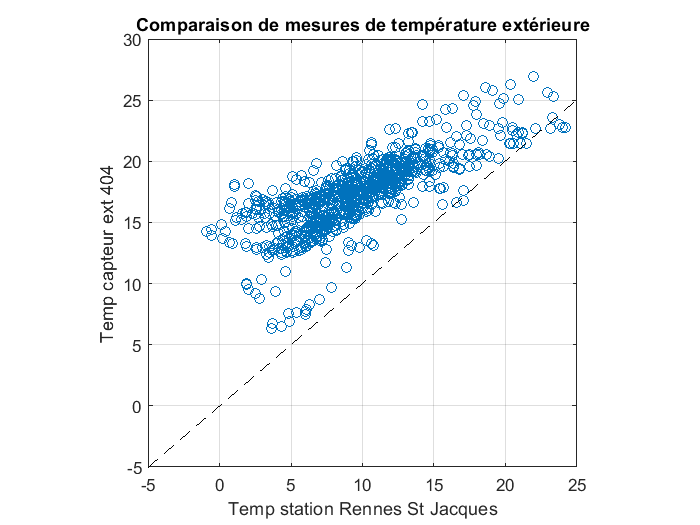

In [87]:
plot(Temp_out_cmp.Temp_StJacques, Temp_out_cmp.Temp_ext_404, 'o')
hold on
plot([-5 25], [-5 25], 'k--') % ligne de référence y=x
axis square
title('Comparaison de mesures de température extérieure')
xlabel('Temp station Rennes St Jacques')
ylabel('Temp capteur ext 404')
grid

Commentaire sur les données : le capteur de température extérieure de la salle 404 ne donne pas une mesure de qualité,
car il est simplement posé sur le rebord de la fenêtre. Conséquences :
* il subit l'influence du bâtiment mal isolé
* il est exposé au soleil le matin (cf. pics sur le tracé temporel)

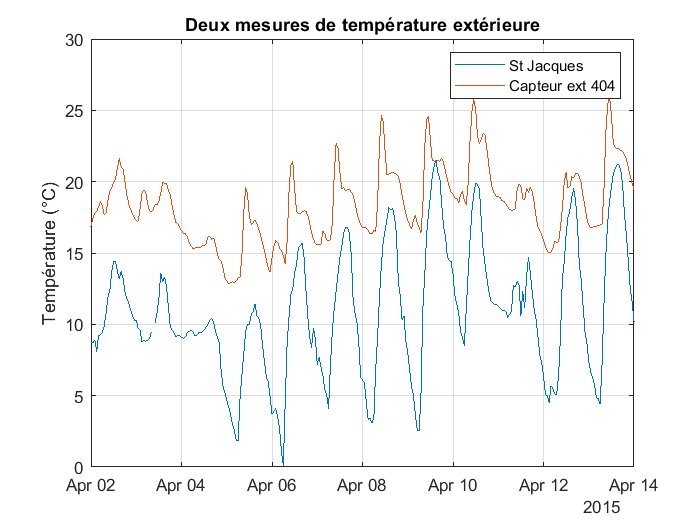

In [88]:
date_lim = [datetime(2015,04,02) datetime(2015,04,14)];

plot(Temp_out_cmp.Time, Temp_out_cmp.Temp_StJacques)
hold on
plot(Temp_out_cmp.Time, Temp_out_cmp.Temp_ext_404)

legend('St Jacques', 'Capteur ext 404')
title('Deux mesures de température extérieure')
ylabel('Température (°C)')
xlim(date_lim)
grid on

## 3) Recap final

Fichiers : fiche de présence salle 404 (et log qualité de l’air, archive météo)

### Chargement du fichier de présence

Aperçu de `fiche_presence.csv` :

```
date;valeur
2015-03-06T12:44:00Z;1
2015-03-06T12:58:00Z;5
2015-03-06T13:41:00Z;0
2015-03-06T15:10:00Z;1
2015-03-06T15:35:00Z;0
```

→ un fichier CSV avec deux colonnes (date et valeur=nb de personnes présentes) séparées par `;`.

Malheureusement, la **détection automatique du format du fichier échoue** !
(e.g. `Delimiter: {':'}`)

In [90]:
opts = detectImportOptions('data/fiche_presence.csv')


opts = 

  DelimitedTextImportOptions with properties:

   Format Properties:
                    Delimiter: {':'}
                   Whitespace: '\b\t '
                   LineEnding: {'\n'  '\r'  '\r\n'}
                 CommentStyle: {}
    ConsecutiveDelimitersRule: 'split'
        LeadingDelimitersRule: 'keep'
                EmptyLineRule: 'skip'
                     Encoding: 'windows-1252'

   Replacement Properties:
                  MissingRule: 'fill'
              ImportErrorRule: 'fill'
             ExtraColumnsRule: 'addvars'

   Variable Import Properties: Set types by name using setvartype
                VariableNames: {'Var1', 'Var2', 'Var3'}
                VariableTypes: {'char', 'double', 'char'}
        SelectedVariableNames: {'Var1', 'Var2', 'Var3'}
              VariableOptions: [1x3 matlab.io.VariableImportOptions] 
	Access VariableOptions sub-properties using setvaropts/getvaropts

   Location Properties:
                    DataLines: [2 Inf]
            Var

Si on n'y prête pas garde, le table résultant est en vrac :

In [91]:
pres = readtable('data/fiche_presence.csv',opts);

disp(head(pres))

         Var1          Var2     Var3  
    _______________    ____    _______

    '2015-03-06T12'     44     '00Z;1'
    '2015-03-06T12'     58     '00Z;5'
    '2015-03-06T13'     41     '00Z;0'
    '2015-03-06T15'     10     '00Z;1'
    '2015-03-06T15'     35     '00Z;0'
    '2015-03-10T13'      0     '00Z;2'
    '2015-03-10T13'     45     '00Z;0'
    '2015-03-12T10'     30     '00Z;3'



Heureusement, [detectImportOptions](https://fr.mathworks.com/help/matlab/ref/detectimportoptions.html) accepte des arguments pour l'aider dans son travail. En spécifiant le délimiteur, il est alors capable de trouver les deux colonnes, y compris leur nom :

In [92]:
opts = detectImportOptions('data/fiche_presence.csv', 'Delimiter', ';')


opts = 

  DelimitedTextImportOptions with properties:

   Format Properties:
                    Delimiter: {';'}
                   Whitespace: '\b\t '
                   LineEnding: {'\n'  '\r'  '\r\n'}
                 CommentStyle: {}
    ConsecutiveDelimitersRule: 'split'
        LeadingDelimitersRule: 'keep'
                EmptyLineRule: 'skip'
                     Encoding: 'windows-1252'

   Replacement Properties:
                  MissingRule: 'fill'
              ImportErrorRule: 'fill'
             ExtraColumnsRule: 'addvars'

   Variable Import Properties: Set types by name using setvartype
                VariableNames: {'date', 'valeur'}
                VariableTypes: {'char', 'double'}
        SelectedVariableNames: {'date', 'valeur'}
              VariableOptions: [1x2 matlab.io.VariableImportOptions] 
	Access VariableOptions sub-properties using setvaropts/getvaropts

   Location Properties:
                    DataLines: [2 Inf]
            VariableNamesLine: 1
  

In [101]:
pres = readtable('data/fiche_presence.csv',opts);

disp(head(pres,5))

             date             valeur
    ______________________    ______

    '2015-03-06T12:44:00Z'      1   
    '2015-03-06T12:58:00Z'      5   
    '2015-03-06T13:41:00Z'      0   
    '2015-03-06T15:10:00Z'      1   
    '2015-03-06T15:35:00Z'      0   



#### Parsing des dates

La colonne 'date' n'est pas décodée (cf. les guillemets qui indiques un type `char`). Il faut faire le parsing à la main, en spécifiant le 'InputFormat' (cf. liens plus haut)

In [102]:
pres.date = datetime(pres.date, 'InputFormat', 'yyyy-MM-dd''T''HH:mm:ss''Z''');

disp(head(pres,5))

            date            valeur
    ____________________    ______

    06-Mar-2015 12:44:00      1   
    06-Mar-2015 12:58:00      5   
    06-Mar-2015 13:41:00      0   
    06-Mar-2015 15:10:00      1   
    06-Mar-2015 15:35:00      0   



Il ne reste plus qu'à converter en `timetable` pour commencer l'analyse.

On peut aussi renommer la colonne 'valeur' en 'presence' (terme plus spécifique)

In [103]:
pres = table2timetable(pres);
pres.Properties.VariableNames = {'presence'};

disp(head(pres,5))

            date            presence
    ____________________    ________

    06-Mar-2015 12:44:00       1    
    06-Mar-2015 12:58:00       5    
    06-Mar-2015 13:41:00       0    
    06-Mar-2015 15:10:00       1    
    06-Mar-2015 15:35:00       0    



### Rééchantillonnage

La présence est une variable à valeur *discrète*.
Si on veut la suréchantillonner, il faut une méthode qui respecte ce caractère discret :
* exemple : blocage d'ordre 0 ('previous'), interpolation au plus proche ('nearest')
* contre exemple : interpolation linéaire

Par ailleurs, comme chaque enregistrement correspond à l'instant d'un changement de valeur, seule l'interpolation 'previous' a du sens pour cette série.

In [126]:
pres_1m = retime(pres, 'minutely', 'previous'); % OK
pres_1m_near = retime(pres, 'minutely', 'nearest'); % Méthode d'interpolation inapropriée

In [115]:
disp(head(pres_1m, 4))

            date            presence
    ____________________    ________

    06-Mar-2015 12:44:00       1    
    06-Mar-2015 12:45:00       1    
    06-Mar-2015 12:46:00       1    
    06-Mar-2015 12:47:00       1    



In [143]:
disp(height(pres_1m))

      110862



Visualisation des données interpolées

<div style="background:#d7ffb0;border: 1px solid #4ea000;padding:5px;">
    Bonne pratique : après une interpolation (sur-échantillonnage) ou une agrégation (sous-échantillonnage), toujours vérifier (sur un extrait) que l'on a <em>bien obtenu ce que l'on souhaitait</em>.
</div>

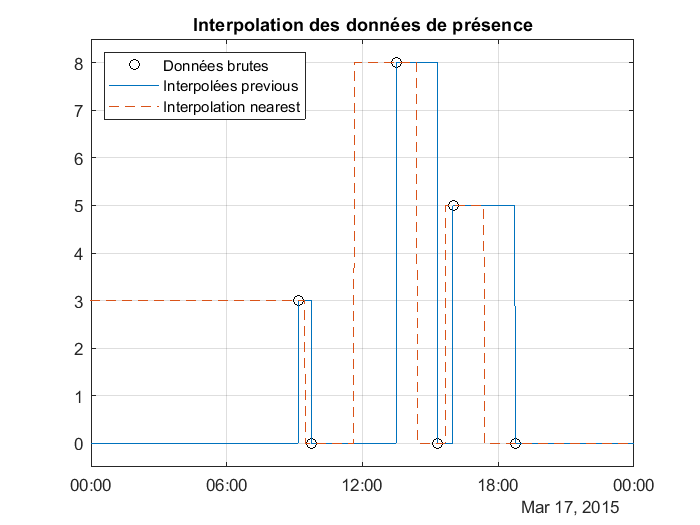

In [131]:
plot(pres.date, pres.presence, 'ko')
hold on
plot(pres_1m.date, pres_1m.presence, '-')
plot(pres_1m.date, pres_1m_near.presence, '--')
grid on
title('Interpolation des données de présence')
legend('Données brutes', 'Interpolées previous', 'Interpolation nearest', 'Location', 'northwest')

% Zoom
date_lim = [datetime(2015,03,17) datetime(2015,03,18)];
xlim(date_lim)
ylim([-0.5 8.5])

### Analyse CO2 ~ présence

#### Tracé temporel

Pour un tracé temporel, inutile d'avoir une base de temps commune.

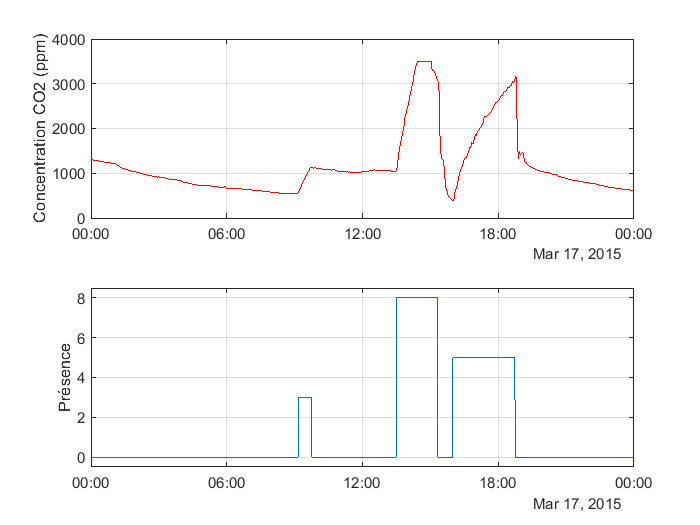

In [170]:
ax1 = subplot(2,1,1);
plot(CO2.Time, CO2.value, 'r')
grid on
ylabel('Concentration CO2 (ppm)')

ax2 = subplot(2,1,2);
plot(pres_1m.date, pres_1m.presence)
grid on
ylim([-0.5 8.5])
ylabel('Présence')

% Zoom
linkaxes([ax1 ax2], 'x') % zoom x commun
date_lim = [datetime(2015,03,17) datetime(2015,03,18)];
xlim(date_lim)

#### Nuage de point, régression…

Pour cela, il faut synchroniser les données

In [132]:
CO2_pres = synchronize(CO2, pres_1m)
head(CO2_pres)

In [140]:
CO2_1m = retime(CO2, 'minutely', 'linear');
disp(head(CO2_1m, 20))

             Time              value 
    _______________________    ______

    2015-03-09 17:18:00.000      1630
    2015-03-09 17:19:00.000      1630
    2015-03-09 17:20:00.000      1630
    2015-03-09 17:21:00.000      1630
    2015-03-09 17:22:00.000      1630
    2015-03-09 17:23:00.000      1630
    2015-03-09 17:24:00.000      1630
    2015-03-09 17:25:00.000      1630
    2015-03-09 17:26:00.000      1630
    2015-03-09 17:27:00.000      1630
    2015-03-09 17:28:00.000    1635.2
    2015-03-09 17:29:00.000    1641.7
    2015-03-09 17:30:00.000    1648.3
    2015-03-09 17:31:00.000    1647.5
    2015-03-09 17:32:00.000    1644.2
    2015-03-09 17:33:00.000    1640.9
    2015-03-09 17:34:00.000    1637.5
    2015-03-09 17:35:00.000    1634.1
    2015-03-09 17:36:00.000    1630.7
    2015-03-09 17:37:00.000      1630



In [151]:
height(CO2_1m)


ans =

       52930



In [ ]:
CO2_pres = synchronize(CO2_1m, pres_1m, 'intersection'); % default: 'union'
CO2_pres.Properties.VariableNames{1} = 'CO2'; % rename column 'value' → 'CO2'
disp(head(CO2_pres))

             Time              CO2     presence
    _______________________    ____    ________

    2015-03-09 17:18:00.000    1630       0    
    2015-03-09 17:19:00.000    1630       0    
    2015-03-09 17:20:00.000    1630       0    
    2015-03-09 17:21:00.000    1630       0    
    2015-03-09 17:22:00.000    1630       0    
    2015-03-09 17:23:00.000    1630       0    
    2015-03-09 17:24:00.000    1630       0    
    2015-03-09 17:25:00.000    1630       0    



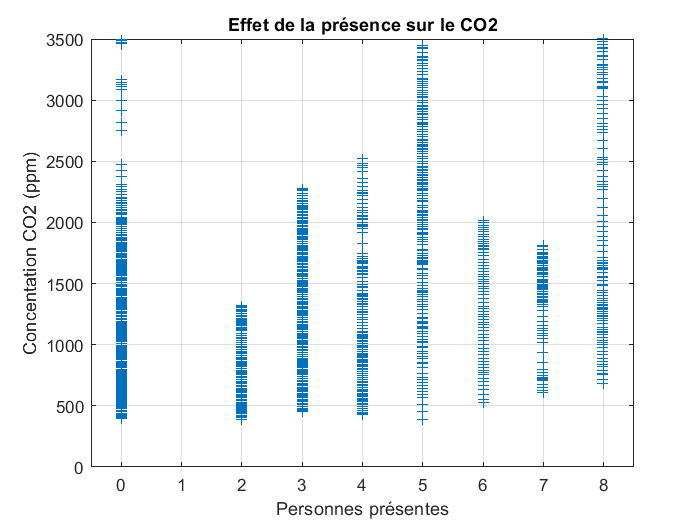

In [176]:
plot(CO2_pres.presence, CO2_pres.CO2, '+');

title('Effet de la présence sur le CO2')
xlabel('Personnes présentes')
xlim([-0.5 8.5])
ylabel('Concentation CO2 (ppm)')
grid on

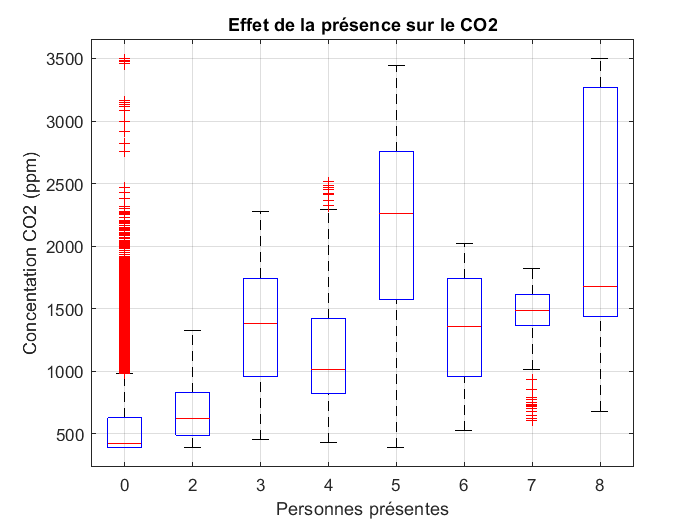

In [177]:
boxplot(CO2_pres.CO2, CO2_pres.presence)

title('Effet de la présence sur le CO2')
xlabel('Personnes présentes')
ylabel('Concentation CO2 (ppm)')
grid on

Observation : nuage de point qui ne montre pas de lien clair entre CO2 et présence. Par contre, ce serait plus clair avec la *variation* du CO2. Le box plot est un peu plus clair, car il montre que les grandes concentration en CO2 lorsqu'il n'y a personnes sont des valeurs extrêmes minoritaires.

*TO BE CONTINUED…*